<a href="https://colab.research.google.com/github/shilpashreshta/Data_Science_projects/blob/Employee_Attribution_Prediction/Employee_Attrition_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMPLOYEE ATTRITION PREDICTION

In [ ]:
# Import Python Lybraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the Employee attrition data by upload or refer next cell for github file read
from google.colab import files
files.upload()

##Read the data

In [ ]:
#Read the file into a dataframe
df= pd.read_csv(r'https://raw.githubusercontent.com/shilpashreshta/Data_Science_projects/refs/heads/Employee_Attribution_Prediction/Employee-Attrition.csv')
df.head()

In [ ]:
#all columns not visible above, so ...
pd.set_option('display.max_columns',None)

##Exploratory Data Analysis

In [ ]:
#shape of data
df.shape

In [ ]:
#check if any columns have null values
df.isnull().any()

In [ ]:
#check if any column has single value entirely
uniq_val= {col: df[col].unique() for col in df.columns}
for col,values in uniq_val.items():
    print(f"{col},: ,{values}")

In [23]:
#Drop the columns having single values entirely: EmployeeCount, StandardHours, Over18
df1=df.drop(['EmployeeCount','EmployeeNumber', 'StandardHours', 'Over18'],axis=1)

In [ ]:
#check for na values
df1.isna().sum()

In [ ]:
#check for null values
df1.isnull().sum()

In [ ]:
df1.info()

In [ ]:
#check for statistical details
df1.describe()

In [19]:
#check for datatypes
#df1.select_dtypes(include='object').columns
for col in df1.columns:
  if df1[col].dtype==object:
    print(str(col)+': '+str(df1[col].unique()))
    print(df1[col].value_counts())
    print('--------------------------------------------------')


Attrition: ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
--------------------------------------------------
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------------------------------
Department: ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------------------------------
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------------------------------------
Gender: ['Female' 'Male']
Gender
Male      882


In [ ]:
#check and drop duplicates if any
df1.drop_duplicates(inplace=True)

In [ ]:
#check if the data is balanced
df1['Attrition'].value_counts()

In [ ]:
#viewing the imbalance in the data
plt.figure(figsize=(5,2))
sns.countplot(y='Attrition',data=df1)

In [ ]:
# relation of Age with Attrition
plt.figure(figsize=(10,5))
sns.countplot(x='Age',hue='Attrition',data=df1)

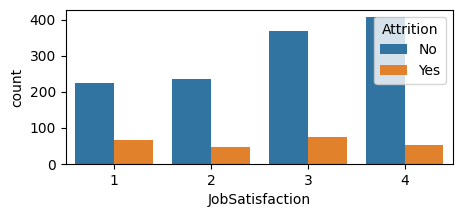

In [22]:
# relation of JobSatisfaction with Attrition

plt.figure(figsize=(5,2))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df1)
plt.show()

In [24]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')